In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
A = torch.rand(4, 4, dtype=torch.float32)
I = torch.from_numpy(np.eye(4, dtype=np.float32))

In [3]:
A

tensor([[0.9951, 0.6473, 0.2089, 0.4368],
        [0.5085, 0.1851, 0.2255, 0.8620],
        [0.6870, 0.8338, 0.1727, 0.9580],
        [0.4337, 0.1673, 0.5339, 0.1966]])

In [7]:
A_inv = np.linalg.inv(A.numpy())
A_inv

array([[ 1.8731642 ,  0.8892364 , -1.5283362 , -0.6140539 ],
       [-0.50020856, -2.0084927 ,  1.9506358 ,  0.4130645 ],
       [-1.1037027 , -0.5375274 ,  0.50067496,  2.3698351 ],
       [-0.70888895,  1.2074677 ,  0.35172972, -0.3464483 ]],
      dtype=float32)

[[ 1.873156    0.8892264  -1.5283278  -0.6140458 ]
 [-0.50020033 -2.0084803   1.9506271   0.4130575 ]
 [-1.1036948  -0.53751975  0.5006683   2.369825  ]
 [-0.7088899   1.2074655   0.35173053 -0.34644744]]
[[ 9.9999595e-01  1.0698467e-06  1.7918908e-06 -2.7509079e-06]
 [ 5.4354423e-06  9.9999917e-01 -7.4416891e-07  4.5564229e-06]
 [ 2.7685701e-06 -7.2111197e-07  9.9999672e-01  1.6309518e-06]
 [-1.1443028e-06 -2.1646821e-07 -8.1743948e-08  9.9999869e-01]]


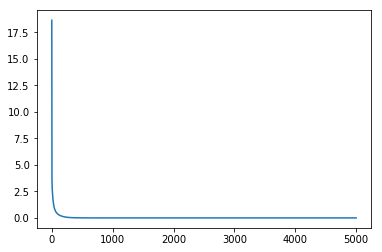

In [13]:
X = torch.rand(4, 4, dtype=torch.float32 , requires_grad=True)
errs = []
for i in range(5000):
    err = (torch.mm(A, X) - I).pow(2).sum()
    err.backward()
    errs.append(err.data.numpy())
    
    with torch.no_grad():
        X -= 0.05 * X.grad

    X.grad.data.zero_()
    
plt.plot(errs)
print(X.data.numpy())

print(np.dot(X.data.numpy(), A.numpy()))